# Bigmart Sales Modeling

## Problem Statement

Bigmart is a big supermarket chain. The business team needs a prediction of the sales per product for each store. The data scientists at Big Mart have collected sales data for 1559 products across 10 stores in different cities. Furthermore, certain attributes of each product and store have been defined. The aim is to build a predictive model and find the sales figures of each product at a particular store.

Using this model, Big Mart will try to understand the properties of products and stores, which play a key role in increasing sales.

Some variables that could affect the target variabel 'sales' are:

1. Time of the week. Weekends are usually busier and lead to more sales.

2. Time of the day. In Big Mart, the sales are higher in the morning and late evening.

3. Time of the year. Sales are often higher during the last few month of the year.

4. Store size and location.

5. The item in question (the item being sold). Items that command more shelf space sell more.

## Library

In [75]:
# import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

## Data preparation

In [28]:
# load the train and test dataset

train = pd.read_csv('D:\Projects\Train_bigmart.csv')
test = pd.read_csv('D:\Projects\Test_bigmart.csv')

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
# checking the number of rows and columns 

print('Train dataset shape', train.shape)
print('\nTrain dataset columns', train.columns)

print('\nTest dataset shape', test.shape)
print('\nTest dataset columns', test.columns)

Train dataset shape (8523, 12)

Train dataset columns Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Test dataset shape (5681, 11)

Test dataset columns Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [31]:
# combine test and train datasets into one file to perform EDA

train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)
print(data.shape)
print(data.columns)

(14204, 13)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')


In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [33]:
# checking numerical data summary

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
# checking for missing values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [35]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [36]:
# checking the unique values in Item_Fat_Content column (there's should be only 2 unique types: low fat and regular)

data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
# check the count vale of Item_Fat_Content

data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Note: The Low Fat products are the most abundant

In [38]:
# uniform the typing format

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['reg'], 'Regular')

In [39]:
# re-check the count vale of Item_Fat_Content

data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [40]:
# checking the unique values in Outlet_Establishment_Year (date range)

data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [41]:
# calculate the outlet age
## assume that the current year is 2018

data['Outlet_Age'] = 2018 - data['Outlet_Establishment_Year']

In [42]:
# checking the unique values in Outlet_Size column

data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [43]:
# checking the Outlet_size value count

data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Note: The majority of outlets are medium and small-scale outlets. Medium-scale is the most commonly occuring value (mode).

In [44]:
# replacing missing value in Outlet_Size with the value "medium", because it is a mode value.

data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [45]:
# replacing missing values in Item_weight with the mean weight

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

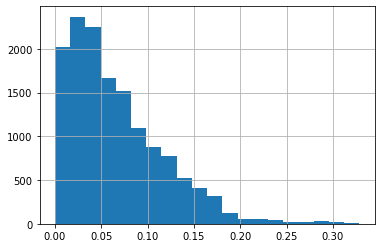

In [46]:
# plot the  histogram to visualize the distribution of Item_Visibility column

data['Item_Visibility'].hist(bins=20)

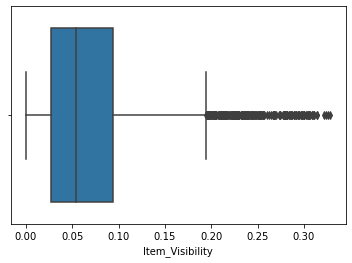

In [47]:
# detecting outliers in Item_Visibility using boxplot visualization

plt.figure()
sns.boxplot(x=data['Item_Visibility'])
plt.show()

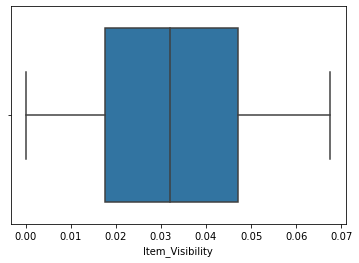

In [48]:
# handling outlier using IQR calculation

Q1 = data['Item_Visibility'].quantile(0.25)
Q3 = data['Item_Visibility'].quantile(0.75)
IQR = Q3 = Q1 # interquantile range

# remove outliers and store resulting data in fill_data
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

# re-check outliers using boxplot
plt.figure()
sns.boxplot(x=fill_data['Item_Visibility'])
plt.show()

In [49]:
# assign fill_data dataset to data dataframe

data = fill_data

In [53]:
# converting numerical values in Item_Visibility column into categories

data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'], [0.000, 0.017, 0.034, 0.051], labels=['Low Viz', 'Med Viz','High Viz'])
data['Item_Visibility_bins'].value_counts()

Med Viz     2463
High Viz    2261
Low Viz     1202
Name: Item_Visibility_bins, dtype: int64

In [54]:
# replacing null values in Item_Visibility column with "Med VIz"

data['Item_Visibility_bins'] = data['Item_Visibility_bins'].replace(np.nan, 'Med Viz', regex=True)

In [55]:
# encoding categorical data using LabelEncoder

## initialize LabelEncoder
le = LabelEncoder()

# transform
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Item_Visibility_bins'] = le.fit_transform(data['Item_Visibility_bins'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [ ]:
# create dummies fot outlet_type

dummy = pd.get_dummies(data['Outlet_Type'])

In [58]:
# checking Item_Identifier value count

data['Item_Identifier'].value_counts()

FDG10    10
DRH49    10
DRF15    10
FDT46    10
FDO11    10
         ..
FDG08     1
DRJ51     1
FDK44     1
FDO23     1
FDJ26     1
Name: Item_Identifier, Length: 1226, dtype: int64

In [59]:
# mapping Item_Identifier values

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD' : 'Food',
                                                             'NC' : 'Non-Consumable',
                                                             'DR' : 'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              5932
Non-Consumable    1784
Drinks             803
Name: Item_Type_Combined, dtype: int64

In [60]:
# perform one-hot-encoding to all columns

data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [61]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [62]:
import warnings
warnings.filterwarnings('ignore')

# drop the columns which have been converted to different type
data.drop(['Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True)

# divide dataset into train and test datasets
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

# drop unnecessary columns
train.drop(['source'], axis=1, inplace=True)
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export modified data
train.to_csv('train_modified_bigmart.csv', index=False)
test.to_csv('test_modified_bigmart.csv', index=False)

In [64]:
# load modified data

train_m = pd.read_csv('train_modified_bigmart.csv')
test_m = pd.read_csv('test_modified_bigmart.csv')

In [65]:
train_m.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

## Modeling

In [66]:
# drop irrelevant columns

X_train = train_m.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train_m.Item_Outlet_Sales

X_test = test_m.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [68]:
# splitting dataset into training and testing dataset

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=0)

### Linear Regression

In [69]:
# fit linear regression to the training dataset

LR = LinearRegression()
LR.fit(xtrain, ytrain)

LinearRegression()

In [70]:
# Find coefficient and intercept of regression line

print(LR.coef_)
LR.intercept_

[-3.18576800e-01 -1.17649764e+03  1.63403187e+01 -4.78511156e+01
  9.03903497e+00 -2.17346805e+01  2.17346805e+01  2.43460128e+02
  2.08422918e+01 -2.64302420e+02  6.84006728e+02 -4.11275914e+02
 -2.72730813e+02 -1.56254178e+03 -2.27188411e+02 -6.01547364e+02
  2.39127755e+03  1.67452558e+01  5.86259406e-01 -1.73315152e+01]


1315.9647893598176

In [72]:
# prediction 
ytest_pred = LR.predict(xtest)

In [73]:
# calculate error using RMSE
print(math.sqrt(mean_squared_error(ytest, ytest_pred)))

1162.2844408508736


In [77]:
# Predict Item_Outlet_Sales in test dataset

y_sales_pred = LR.predict(X_test)
y_sales_pred

array([1746.6722534 , 1573.28052658, 2672.74127087, ...,  733.75647939,
       2375.90729741, 3723.53291694])

In [79]:
test_predictions = pd.DataFrame({'Item_Identifier' : test_m['Item_Identifier'],
                                 'Outlet_Identifier' : test_m['Outlet_Identifier'],
                                 'Item_Outlet_Sales' : y_sales_pred}, columns=['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales'])

test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1746.672253
1,FDW14,OUT017,1573.280527
2,FDQ58,OUT017,2672.741271
3,FDH56,OUT046,1940.122729
4,FDC48,OUT027,2742.357394
...,...,...,...
3419,FDA01,OUT049,966.099564
3420,NCH42,OUT049,3703.748853
3421,DRL35,OUT046,733.756479
3422,FDB58,OUT046,2375.907297
